In [2]:
import tensorflow as tf

In [8]:
train=r"/home/teaching/Atmega_MIC/DP Students/Abhay/cropwise_data/grape"
training_set = tf.keras.utils.image_dataset_from_directory(
    train,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=64,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 25075 files belonging to 4 classes.


In [9]:
classes = training_set.class_names
classes

['grape_black_measles',
 'grape_black_rot',
 'grape_healthy',
 'grape_leaf_blight']

In [10]:
total_batches = tf.data.experimental.cardinality(training_set).numpy()
train_size = int(0.8 * total_batches)
val_size = total_batches - train_size

In [11]:
train_dataset = training_set.take(train_size)
val_dataset = training_set.skip(train_size)
print(len(training_set))
print(len(train_dataset))
print(len(val_dataset))

392
313
79


In [18]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import callbacks

base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze base

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')  # 6 classes
])

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])


In [19]:
from tensorflow.keras.layers import Rescaling, RandomFlip, RandomRotation
from tensorflow.keras import Sequential

preprocessing = Sequential([
    Rescaling(1./255),
    RandomFlip("horizontal"),
    RandomRotation(0.1)
])

train_ds = train_dataset.map(lambda x, y: (preprocessing(x), y))
val_ds = val_dataset.map(lambda x, y: (x / 255.0, y))


In [20]:
early_stop = callbacks.EarlyStopping(patience=3, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(factor=0.4, patience=3, min_lr=1e-6)

In [21]:
history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=15,
                    callbacks=[early_stop, reduce_lr])

Epoch 1/15
254/313 [=======================>......] - ETA: 22s - loss: 0.3297 - categorical_accuracy: 0.8953

Corrupt JPEG data: premature end of data segment


313/313 [==============================] - ETA: 0s - loss: 0.2926 - categorical_accuracy: 0.9073

Corrupt JPEG data: premature end of data segment


313/313 [==============================] - 152s 480ms/step - loss: 0.2926 - categorical_accuracy: 0.9073 - val_loss: 0.1307 - val_categorical_accuracy: 0.9536 - lr: 1.0000e-04
Epoch 2/15
252/313 [=======================>......] - ETA: 22s - loss: 0.1080 - categorical_accuracy: 0.9639

Corrupt JPEG data: premature end of data segment


313/313 [==============================] - ETA: 0s - loss: 0.1041 - categorical_accuracy: 0.9655

Corrupt JPEG data: premature end of data segment


313/313 [==============================] - 147s 469ms/step - loss: 0.1041 - categorical_accuracy: 0.9655 - val_loss: 0.0939 - val_categorical_accuracy: 0.9661 - lr: 1.0000e-04
Epoch 3/15
252/313 [=======================>......] - ETA: 22s - loss: 0.0803 - categorical_accuracy: 0.9730

Corrupt JPEG data: premature end of data segment


313/313 [==============================] - ETA: 0s - loss: 0.0785 - categorical_accuracy: 0.9740

Corrupt JPEG data: premature end of data segment


313/313 [==============================] - 150s 479ms/step - loss: 0.0785 - categorical_accuracy: 0.9740 - val_loss: 0.0799 - val_categorical_accuracy: 0.9714 - lr: 1.0000e-04
Epoch 4/15
252/313 [=======================>......] - ETA: 22s - loss: 0.0665 - categorical_accuracy: 0.9774

Corrupt JPEG data: premature end of data segment


313/313 [==============================] - ETA: 0s - loss: 0.0652 - categorical_accuracy: 0.9782

Corrupt JPEG data: premature end of data segment


313/313 [==============================] - 150s 479ms/step - loss: 0.0652 - categorical_accuracy: 0.9782 - val_loss: 0.0703 - val_categorical_accuracy: 0.9738 - lr: 1.0000e-04
Epoch 5/15
252/313 [=======================>......] - ETA: 22s - loss: 0.0572 - categorical_accuracy: 0.9815

Corrupt JPEG data: premature end of data segment


313/313 [==============================] - ETA: 0s - loss: 0.0561 - categorical_accuracy: 0.9819

Corrupt JPEG data: premature end of data segment


313/313 [==============================] - 150s 478ms/step - loss: 0.0561 - categorical_accuracy: 0.9819 - val_loss: 0.0659 - val_categorical_accuracy: 0.9752 - lr: 1.0000e-04
Epoch 6/15
252/313 [=======================>......] - ETA: 22s - loss: 0.0494 - categorical_accuracy: 0.9841

Corrupt JPEG data: premature end of data segment


313/313 [==============================] - ETA: 0s - loss: 0.0485 - categorical_accuracy: 0.9848

Corrupt JPEG data: premature end of data segment


313/313 [==============================] - 151s 480ms/step - loss: 0.0485 - categorical_accuracy: 0.9848 - val_loss: 0.0598 - val_categorical_accuracy: 0.9792 - lr: 1.0000e-04
Epoch 7/15
252/313 [=======================>......] - ETA: 22s - loss: 0.0439 - categorical_accuracy: 0.9867

Corrupt JPEG data: premature end of data segment


313/313 [==============================] - ETA: 0s - loss: 0.0434 - categorical_accuracy: 0.9871

Corrupt JPEG data: premature end of data segment


313/313 [==============================] - 150s 480ms/step - loss: 0.0434 - categorical_accuracy: 0.9871 - val_loss: 0.0606 - val_categorical_accuracy: 0.9780 - lr: 1.0000e-04
Epoch 8/15
252/313 [=======================>......] - ETA: 22s - loss: 0.0399 - categorical_accuracy: 0.9881

Corrupt JPEG data: premature end of data segment


313/313 [==============================] - ETA: 0s - loss: 0.0396 - categorical_accuracy: 0.9882

Corrupt JPEG data: premature end of data segment


313/313 [==============================] - 150s 477ms/step - loss: 0.0396 - categorical_accuracy: 0.9882 - val_loss: 0.0581 - val_categorical_accuracy: 0.9790 - lr: 1.0000e-04
Epoch 9/15
252/313 [=======================>......] - ETA: 22s - loss: 0.0358 - categorical_accuracy: 0.9892

Corrupt JPEG data: premature end of data segment


313/313 [==============================] - ETA: 0s - loss: 0.0354 - categorical_accuracy: 0.9891

Corrupt JPEG data: premature end of data segment


313/313 [==============================] - 150s 478ms/step - loss: 0.0354 - categorical_accuracy: 0.9891 - val_loss: 0.0555 - val_categorical_accuracy: 0.9818 - lr: 1.0000e-04
Epoch 10/15
248/313 [======================>.......] - ETA: 24s - loss: 0.0327 - categorical_accuracy: 0.9899

Corrupt JPEG data: premature end of data segment


313/313 [==============================] - ETA: 0s - loss: 0.0325 - categorical_accuracy: 0.9901

Corrupt JPEG data: premature end of data segment


313/313 [==============================] - 149s 474ms/step - loss: 0.0325 - categorical_accuracy: 0.9901 - val_loss: 0.0502 - val_categorical_accuracy: 0.9831 - lr: 1.0000e-04
Epoch 11/15
252/313 [=======================>......] - ETA: 22s - loss: 0.0296 - categorical_accuracy: 0.9914

Corrupt JPEG data: premature end of data segment


313/313 [==============================] - ETA: 0s - loss: 0.0295 - categorical_accuracy: 0.9915

Corrupt JPEG data: premature end of data segment


313/313 [==============================] - 149s 475ms/step - loss: 0.0295 - categorical_accuracy: 0.9915 - val_loss: 0.0487 - val_categorical_accuracy: 0.9843 - lr: 1.0000e-04
Epoch 12/15
252/313 [=======================>......] - ETA: 22s - loss: 0.0270 - categorical_accuracy: 0.9925

Corrupt JPEG data: premature end of data segment


313/313 [==============================] - ETA: 0s - loss: 0.0272 - categorical_accuracy: 0.9921

Corrupt JPEG data: premature end of data segment


313/313 [==============================] - 149s 475ms/step - loss: 0.0272 - categorical_accuracy: 0.9921 - val_loss: 0.0497 - val_categorical_accuracy: 0.9839 - lr: 1.0000e-04
Epoch 13/15
252/313 [=======================>......] - ETA: 23s - loss: 0.0252 - categorical_accuracy: 0.9929

Corrupt JPEG data: premature end of data segment


313/313 [==============================] - ETA: 0s - loss: 0.0252 - categorical_accuracy: 0.9930

Corrupt JPEG data: premature end of data segment


313/313 [==============================] - 152s 485ms/step - loss: 0.0252 - categorical_accuracy: 0.9930 - val_loss: 0.0472 - val_categorical_accuracy: 0.9843 - lr: 1.0000e-04
Epoch 14/15
252/313 [=======================>......] - ETA: 22s - loss: 0.0227 - categorical_accuracy: 0.9944

Corrupt JPEG data: premature end of data segment


313/313 [==============================] - ETA: 0s - loss: 0.0222 - categorical_accuracy: 0.9942

Corrupt JPEG data: premature end of data segment


313/313 [==============================] - 150s 477ms/step - loss: 0.0222 - categorical_accuracy: 0.9942 - val_loss: 0.0462 - val_categorical_accuracy: 0.9845 - lr: 1.0000e-04
Epoch 15/15
252/313 [=======================>......] - ETA: 22s - loss: 0.0213 - categorical_accuracy: 0.9946

Corrupt JPEG data: premature end of data segment


313/313 [==============================] - ETA: 0s - loss: 0.0212 - categorical_accuracy: 0.9947

Corrupt JPEG data: premature end of data segment


313/313 [==============================] - 150s 480ms/step - loss: 0.0212 - categorical_accuracy: 0.9947 - val_loss: 0.0449 - val_categorical_accuracy: 0.9843 - lr: 1.0000e-04


In [22]:
train_loss,train_acc = model.evaluate(train_ds)

252/313 [=======================>......] - ETA: 22s - loss: 0.0187 - categorical_accuracy: 0.9960

Corrupt JPEG data: premature end of data segment


313/313 [==============================] - 115s 366ms/step - loss: 0.0185 - categorical_accuracy: 0.9961


In [23]:
train_loss,train_acc

(0.018464138731360435, 0.996056318283081)

In [24]:
val_loss,val_acc=model.evaluate(val_ds)

Corrupt JPEG data: premature end of data segment


79/79 [==============================] - 31s 357ms/step - loss: 0.0453 - categorical_accuracy: 0.9837


In [25]:
model.save("trained_model_grape.keras")

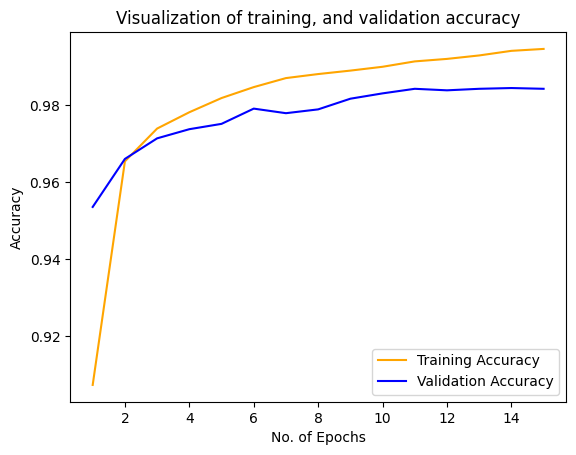

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

epochs=[i for i in range(1,16)]
plt.plot(epochs,history.history['categorical_accuracy'],color='orange',label='Training Accuracy')
plt.plot(epochs,history.history['val_categorical_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.title('Visualization of training, and validation accuracy')
plt.legend()
plt.show()


In [28]:
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # normalize
    img_array = np.expand_dims(img_array, axis=0)  # add batch dimension

    predictions = model.predict(img_array)
    predicted_class = classes[np.argmax(predictions)]

    print(f"Predicted class: {predicted_class}")
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
    plt.show()

from tensorflow.keras.preprocessing import image
import numpy as np

predict_image("/home/teaching/Atmega_MIC/DP Students/Abhay/cropwise_data/grape/grape_black_rot/grape_Black Rot.1.jpg")


FileNotFoundError: [Errno 2] No such file or directory: '/home/teaching/Atmega_MIC/DP Students/Abhay/cropwise_data/grape/grape_black_rot/grape_Black Rot.1.jpg'